In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import collections

from tqdm.auto import tqdm

import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wassname/.pyenv/versions/3.7.2/envs/jup3.7.2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [3]:
from src.data.gp_curves import GPCurvesReader
from src.models.model import LatentModel

In [4]:
def plot_functions(target_x, target_y, context_x, context_y, pred_y, std):
    """Plots the predicted mean and variance and the context points.
  
  Args: 
    target_x: An array of shape [B,num_targets,1] that contains the
        x values of the target points.
    target_y: An array of shape [B,num_targets,1] that contains the
        y values of the target points.
    context_x: An array of shape [B,num_contexts,1] that contains 
        the x values of the context points.
    context_y: An array of shape [B,num_contexts,1] that contains 
        the y values of the context points.
    pred_y: An array of shape [B,num_targets,1] that contains the
        predicted means of the y values at the target points in target_x.
    std: An array of shape [B,num_targets,1] that contains the
        predicted std dev of the y values at the target points in target_x.
      """
  # Plot everything
    plt.plot(target_x[0], pred_y[0], 'b', linewidth=2)
    plt.plot(target_x[0], target_y[0], 'k:', linewidth=2)
    plt.plot(context_x[0], context_y[0], 'ko', markersize=10)
    plt.fill_between(
          target_x[0, :, 0],
          pred_y[0, :, 0] - std[0, :, 0],
          pred_y[0, :, 0] + std[0, :, 0],
          alpha=0.5,
          facecolor='#65c9f7',
          interpolate=True)

  # Make the plot pretty
    plt.yticks([-2, 0, 2], fontsize=16)
    plt.xticks([-2, 0, 2], fontsize=16)
    plt.ylim([-2, 2])
    plt.grid('off')
    ax = plt.gca()
    plt.show()

In [5]:

MAX_CONTEXT_POINTS = 50 
random_kernel_parameters=True 

dataset_train = GPCurvesReader(
    batch_size=16, max_num_context=MAX_CONTEXT_POINTS, random_kernel_parameters=random_kernel_parameters)

dataset_test = GPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS, testing=True, random_kernel_parameters=random_kernel_parameters)

In [6]:

model = LatentModel(1, 1, 64, latent_enc_self_attn_type="multihead", det_enc_self_attn_type="multihead",
                   det_enc_cross_attn_type="multihead").cuda()

In [7]:
optim = torch.optim.AdamW(model.parameters(), lr=1e-5)

train: 0   12


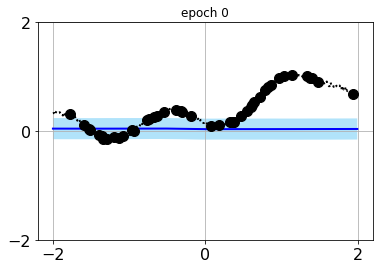

train: 100 6.391
train: 200 5.626
train: 300 6.16
train: 400 5.766
train: 500 5.624
train: 600 5.689
train: 700 5.117
train: 800 3.194
train: 900 4.035
train: 1000 3.541
train: 1100 4.288
train: 1200 4.116
train: 1300 3.648
train: 1400 2.625
train: 1500 3.166
train: 1600 3.01
train: 1700 3.108
train: 1800 3.864
train: 1900 4.774
train: 2000 2.515
train: 2100 2.655
train: 2200 3.437
train: 2300 2.293
train: 2400 2.701
train: 2500 3.267
train: 2600 2.44
train: 2700 2.663
train: 2800 2.313
train: 2900 2.96
train: 3000 3.034
train: 3100 2.297
train: 3200 2.276
train: 3300 2.389
train: 3400 2.222
train: 3500 2.562
train: 3600 1.77
train: 3700 3.312
train: 3800 2.641
train: 3900 1.478
train: 4000 1.908
train: 4100 1.738
train: 4200 2.144
train: 4300 2.049
train: 4400 1.978
train: 4500 2.141
train: 4600 2.234
train: 4700 1.66
train: 4800 2.124
train: 4900 1.431
train: 5000 1.551


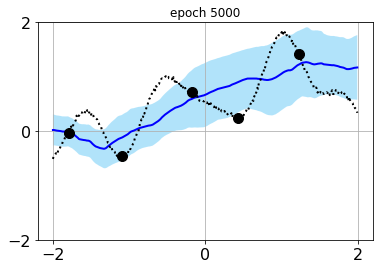

train: 5100 1.679
train: 5200 1.883
train: 5300 2.049
train: 5400 1.543
train: 5500 2.868
train: 5600 1.683
train: 5700 1.899
train: 5800 1.303
train: 5900 1.385
train: 6000 1.294
train: 6100 1.185
train: 6200 2.53
train: 6300 1.166
train: 6400 1.804
train: 6500 1.36
train: 6600 0.9277
train: 6700 1.271
train: 6800 1.094
train: 6900 1.327
train: 7000 1.138
train: 7100 1.075
train: 7200 1.835
train: 7300 1.104
train: 7400 1.488
train: 7500 1.139
train: 7600 0.6968
train: 7700 0.7172
train: 7800  1.5
train: 7900 2.028
train: 8000 1.62
train: 8100 0.5501
train: 8200 0.7213
train: 8300 0.7354
train: 8400 0.5944
train: 8500 0.6943
train: 8600 1.779
train: 8700 1.152
train: 8800 0.519
train: 8900 0.8859
train: 9000 0.4783
train: 9100 0.7806
train: 9200 0.6132
train: 9300 0.5164
train: 9400 0.7371
train: 9500 1.511
train: 9600 0.567
train: 9700 0.5146
train: 9800 0.6316
train: 9900 0.5202
train: 10000 1.142


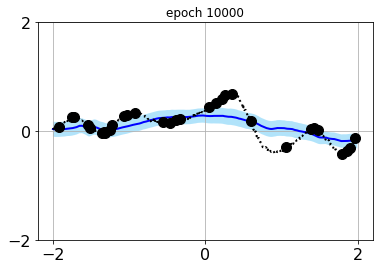

train: 10100 0.8833
train: 10200 0.5416
train: 10300 0.4089
train: 10400 0.4403
train: 10500 2.297
train: 10600 0.4174
train: 10700 1.498
train: 10800 0.6495
train: 10900 0.2989
train: 11000 0.6395
train: 11100 0.44
train: 11200 0.5389
train: 11300 0.2969
train: 11400 0.5898
train: 11500 0.2404
train: 11600 0.8724
train: 11700 0.6155
train: 11800 1.239
train: 11900 0.7685
train: 12000 0.7193
train: 12100 0.2667
train: 12200 0.4916
train: 12300 0.4796
train: 12400 0.1291
train: 12500 0.5619
train: 12600 0.06822
train: 12700 0.1349
train: 12800 0.1807
train: 12900 -0.01337
train: 13000 0.1332
train: 13100 0.1858
train: 13200 0.2523
train: 13300 0.6207
train: 13400 0.1929
train: 13500 0.3042
train: 13600 0.07761
train: 13700 0.1647
train: 13800 0.4122
train: 13900 0.3124
train: 14000 0.2281
train: 14100 0.6712
train: 14200 0.6139
train: 14300 0.4546
train: 14400 0.9218
train: 14500 0.01121
train: 14600 0.07928
train: 14700 -0.1427
train: 14800 -0.1767
train: 14900 0.3025
train: 15000 0.18

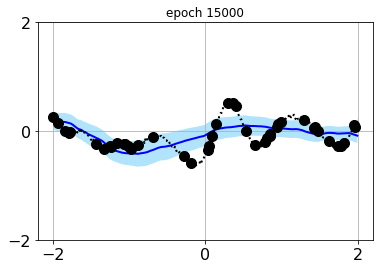

train: 15100 0.06924
train: 15200 0.104
train: 15300 -0.05432
train: 15400 0.0878
train: 15500 0.3096
train: 15600 -0.101
train: 15700 -0.1815
train: 15800 0.01411
train: 15900 -0.0145
train: 16000 0.4367
train: 16100 -0.1469
train: 16200 0.2669
train: 16300 0.3939
train: 16400 0.001367
train: 16500 0.06631
train: 16600 0.007301
train: 16700 0.05867
train: 16800 0.259
train: 16900 -0.06433
train: 17000 -0.1931
train: 17100 0.3358
train: 17200 -0.05535
train: 17300 0.08028
train: 17400 -0.332
train: 17500 -0.1409
train: 17600 -0.07089
train: 17700 -0.2534
train: 17800 0.8266
train: 17900 -0.2207
train: 18000 0.08128
train: 18100 -0.1946
train: 18200 -0.2114
train: 18300 0.5667
train: 18400 0.03189
train: 18500 -0.2915
train: 18600 0.02664
train: 18700 0.1672
train: 18800 -0.1621
train: 18900 -0.2582
train: 19000 -0.1913
train: 19100 -0.1661
train: 19200 0.2957
train: 19300 -0.3063
train: 19400 -0.1645
train: 19500 0.2155
train: 19600 0.4337
train: 19700 0.7424
train: 19800 -0.07544
trai

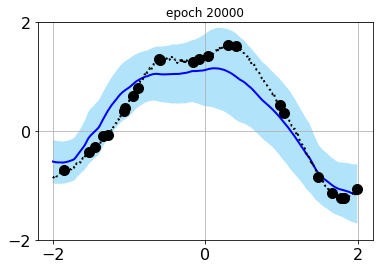

train: 20100 0.06119
train: 20200 -0.199
train: 20300 -0.1302
train: 20400 -0.2106
train: 20500 -0.2188
train: 20600 0.4964
train: 20700 -0.1303
train: 20800 1.103
train: 20900 0.09169
train: 21000 -0.3041
train: 21100 -0.4382
train: 21200 -0.181
train: 21300 -0.4443
train: 21400 -0.3059
train: 21500 0.05672
train: 21600 -0.1732
train: 21700 0.02088
train: 21800 0.2825
train: 21900 -0.2488
train: 22000 -0.2143
train: 22100 -0.3213
train: 22200 -0.2591
train: 22300 -0.005762
train: 22400 0.7372
train: 22500 -0.3272
train: 22600 -0.01348
train: 22700 -0.1986
train: 22800 -0.2316
train: 22900 0.2392
train: 23000 -0.07332
train: 23100 -0.3443
train: 23200 -0.1578
train: 23300 -0.2344
train: 23400 0.1857
train: 23500 -0.3545
train: 23600 -0.1258
train: 23700 -0.4249
train: 23800 -0.2055
train: 23900 -0.266
train: 24000 -0.3299
train: 24100 -0.3036
train: 24200 -0.2779
train: 24300 0.4617
train: 24400 -0.2216
train: 24500 -0.009392
train: 24600 -0.1579
train: 24700 -0.2255
train: 24800 -0.40

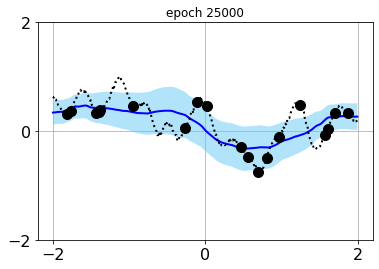

train: 25100 -0.2749
train: 25200 0.7059
train: 25300 -0.159
train: 25400 -0.4899
train: 25500 -0.3573
train: 25600 -0.3288
train: 25700 -0.4397
train: 25800 -0.3074
train: 25900 -0.2532
train: 26000 -0.4401
train: 26100 -0.1473
train: 26200 -0.04771
train: 26300 -0.2409
train: 26400 -0.1282
train: 26500 -0.1763
train: 26600 -0.4274
train: 26700 -0.3214
train: 26800 -0.2783
train: 26900 -0.2924
train: 27000 -0.4839
train: 27100 -0.1878
train: 27200 -0.3737
train: 27300 0.01148
train: 27400 -0.3291
train: 27500 -0.008919
train: 27600 -0.4141
train: 27700 0.02007
train: 27800 -0.4151
train: 27900 -0.4876
train: 28000 -0.2893
train: 28100 0.03273
train: 28200 -0.3545
train: 28300 -0.08176
train: 28400 -0.5277
train: 28500 -0.3849
train: 28600 -0.1808
train: 28700 0.6243
train: 28800 -0.1382
train: 28900 -0.4157
train: 29000 -0.5043
train: 29100 -0.2007
train: 29200 -0.2879
train: 29300 -0.03593
train: 29400 -0.4114
train: 29500 -0.09357
train: 29600 -0.1297
train: 29700 -0.3818
train: 298

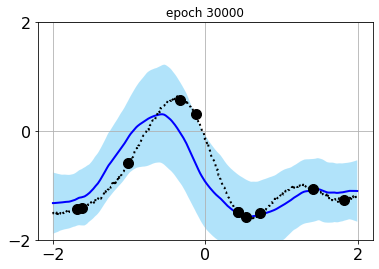

train: 30100 0.016
train: 30200 -0.3577
train: 30300 -0.1435
train: 30400 -0.09736
train: 30500 -0.3209
train: 30600 -0.4411
train: 30700 -0.3613
train: 30800 -0.3102
train: 30900 0.003127
train: 31000 -0.3805
train: 31100 -0.5039
train: 31200 -0.2611
train: 31300 0.4362
train: 31400 -0.1305
train: 31500 -0.06019
train: 31600 -0.09598
train: 31700 -0.1576
train: 31800 -0.07163
train: 31900 -0.3561
train: 32000 -0.365
train: 32100 -0.5078
train: 32200 -0.1704
train: 32300 -0.4464
train: 32400 -0.3407
train: 32500 -0.4767
train: 32600 -0.4733
train: 32700 -0.2781
train: 32800 -0.5611
train: 32900 -0.4024
train: 33000 -0.3068
train: 33100 -0.5028
train: 33200 -0.2751
train: 33300 -0.239
train: 33400 -0.4221
train: 33500 -0.3042
train: 33600 -0.4042
train: 33700 -0.5841
train: 33800 -0.115
train: 33900 -0.4258
train: 34000 -0.1761
train: 34100 -0.4703
train: 34200 -0.2885
train: 34300 -0.2225
train: 34400 -0.4583
train: 34500 -0.2198
train: 34600 -0.4471
train: 34700 -0.5334
train: 34800 -

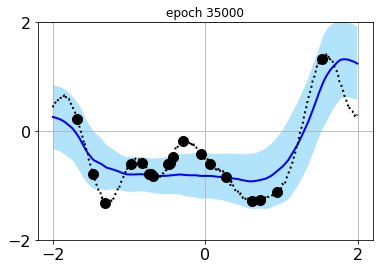

train: 35100 -0.2951
train: 35200 -0.0906
train: 35300 -0.04057
train: 35400 -0.1684
train: 35500 -0.415
train: 35600 -0.1741
train: 35700 -0.3815
train: 35800 -0.4587
train: 35900 -0.2565
train: 36000 -0.3454
train: 36100 -0.3148
train: 36200 -0.3147
train: 36300 -0.008909
train: 36400 -0.4153
train: 36500 -0.3658
train: 36600 -0.1066
train: 36700 -0.4122
train: 36800 -0.3988
train: 36900 1.394
train: 37000 -0.4366
train: 37100 -0.3834
train: 37200 -0.2065
train: 37300 0.5142
train: 37400 -0.3017
train: 37500 -0.5638
train: 37600 -0.2884
train: 37700 0.8149
train: 37800 -0.4126
train: 37900 -0.5088
train: 38000 -0.2031
train: 38100 -0.4316
train: 38200 -0.4564
train: 38300 -0.1997
train: 38400 -0.4695
train: 38500 -0.1389
train: 38600 -0.1985
train: 38700 -0.4592
train: 38800 -0.4399
train: 38900 -0.4231
train: 39000 -0.4825
train: 39100 -0.1456
train: 39200 -0.3884
train: 39300 -0.1665
train: 39400 -0.4494
train: 39500 0.178
train: 39600 -0.536
train: 39700 -0.3568
train: 39800 -0.13

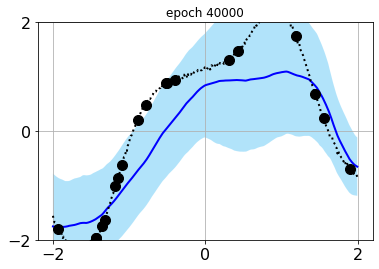

train: 40100 -0.3361
train: 40200 -0.2769
train: 40300 -0.1495
train: 40400 -0.4157
train: 40500 -0.509
train: 40600 -0.5947
train: 40700 0.1806
train: 40800 -0.5638
train: 40900 -0.4924
train: 41000 -0.2861
train: 41100 -0.4502
train: 41200 -0.2923
train: 41300 -0.1556
train: 41400 -0.4992
train: 41500 -0.4752
train: 41600 -0.5355
train: 41700 -0.06264
train: 41800 -0.1835
train: 41900 -0.605
train: 42000 -0.4835
train: 42100 -0.4136
train: 42200 -0.4599
train: 42300 -0.2532
train: 42400 -0.5888
train: 42500 -0.4319
train: 42600 0.1936
train: 42700 -0.4948
train: 42800 -0.4585
train: 42900 0.05243
train: 43000 0.6354
train: 43100 -0.5109
train: 43200 -0.5011
train: 43300 -0.1594
train: 43400 -0.4082
train: 43500 -0.5146
train: 43600 -0.5954
train: 43700 -0.4624
train: 43800 -0.3886
train: 43900 -0.3067
train: 44000 -0.4036
train: 44100 -0.4288
train: 44200 -0.3456
train: 44300 -0.4572
train: 44400 -0.1831
train: 44500 -0.4771
train: 44600 -0.07303
train: 44700 -0.2803
train: 44800 -0.

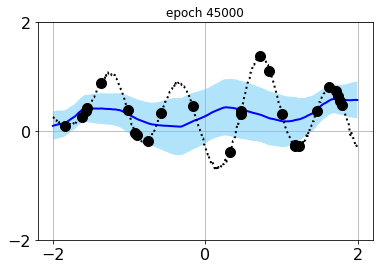

train: 45100 -0.3842
train: 45200 -0.3435
train: 45300 -0.2018
train: 45400 -0.3381
train: 45500 -0.2645
train: 45600 -0.4835
train: 45700 -0.3632
train: 45800 -0.4354
train: 45900 -0.6229
train: 46000 -0.5243
train: 46100 -0.551
train: 46200 0.1835
train: 46300 -0.4622
train: 46400 -0.3765
train: 46500 -0.5116
train: 46600 -0.3575
train: 46700 0.2924
train: 46800 -0.2678
train: 46900 -0.5704
train: 47000 -0.3927
train: 47100 -0.3198
train: 47200 -0.3481
train: 47300 -0.543
train: 47400 -0.285
train: 47500 -0.1016
train: 47600 0.1696
train: 47700 -0.1291
train: 47800 -0.4109
train: 47900 0.6475
train: 48000 -0.2291
train: 48100 -0.5583
train: 48200 -0.6285
train: 48300 -0.5422
train: 48400 -0.5883
train: 48500 -0.5173
train: 48600 -0.2797
train: 48700 -0.33
train: 48800 -0.4838
train: 48900 -0.1947
train: 49000 -0.4829
train: 49100 -0.4886
train: 49200 -0.398
train: 49300 -0.4105
train: 49400 -0.6567
train: 49500 -0.2483
train: 49600 -0.248
train: 49700 -0.5554
train: 49800 -0.401
trai

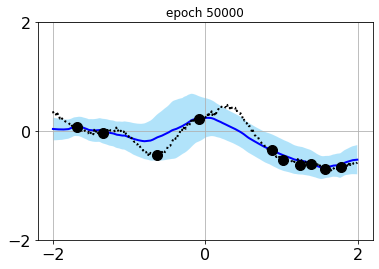

train: 50100 -0.2059
train: 50200 -0.4191
train: 50300 -0.6203
train: 50400 -0.5944
train: 50500 -0.3157
train: 50600 -0.5358
train: 50700 -0.5212
train: 50800 -0.628
train: 50900 -0.5914
train: 51000 -0.4556
train: 51100 -0.6906
train: 51200 -0.5757
train: 51300 -0.6216
train: 51400 -0.3698
train: 51500 -0.4812
train: 51600 -0.4582
train: 51700 -0.3907
train: 51800 -0.3347
train: 51900 -0.5924
train: 52000 -0.05161
train: 52100 -0.5887
train: 52200 0.06346
train: 52300 -0.3497
train: 52400 -0.4621
train: 52500 -0.4636
train: 52600 -0.199
train: 52700 -0.5693
train: 52800 -0.1125
train: 52900 -0.4188
train: 53000 -0.4789
train: 53100 -0.2192
train: 53200 -0.3205
train: 53300 -0.5039
train: 53400 -0.5589
train: 53500 -0.256
train: 53600 -0.5859
train: 53700 -0.5084
train: 53800 -0.6056
train: 53900 -0.2234
train: 54000 -0.4973
train: 54100 -0.4658
train: 54200 -0.2071
train: 54300 -0.1337
train: 54400 -0.5018
train: 54500 -0.5083
train: 54600 -0.399
train: 54700 -0.3569
train: 54800 -0.

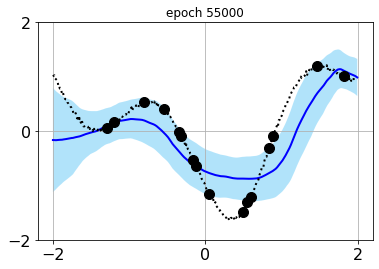

train: 55100 -0.3495
train: 55200 -0.4135
train: 55300 -0.5178
train: 55400 0.0407
train: 55500 -0.5934
train: 55600 0.4012
train: 55700 -0.5306
train: 55800 -0.2641
train: 55900 -0.5301
train: 56000 0.3507
train: 56100 -0.5479
train: 56200 -0.5012
train: 56300 -0.5158
train: 56400 -0.3515
train: 56500 -0.2489
train: 56600 -0.4201
train: 56700 -0.5697
train: 56800 -0.5252
train: 56900 -0.4077
train: 57000 -0.3253
train: 57100 -0.6657
train: 57200 -0.2893
train: 57300 -0.4924
train: 57400 -0.2679
train: 57500 -0.5879
train: 57600 -0.485
train: 57700 -0.1754
train: 57800 -0.4477
train: 57900 0.5399
train: 58000 -0.2076
train: 58100 -0.2377
train: 58200 -0.2971
train: 58300 -0.1129
train: 58400 -0.5077
train: 58500 -0.5757
train: 58600 0.08109
train: 58700 -0.5244
train: 58800 -0.3019
train: 58900 -0.1113
train: 59000 -0.3951
train: 59100 -0.4641
train: 59200 -0.6042
train: 59300 -0.5076
train: 59400 -0.5421
train: 59500 -0.1061
train: 59600 -0.2968
train: 59700 0.2121
train: 59800 -0.526

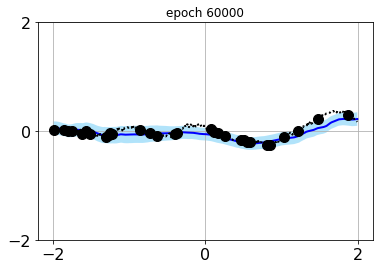

train: 60100 -0.4997
train: 60200 -0.2832
train: 60300 -0.4246
train: 60400 -0.683
train: 60500 -0.4127
train: 60600 -0.5115
train: 60700 -0.4926
train: 60800 -0.6959
train: 60900 -0.6024
train: 61000 -0.4754
train: 61100 -0.2929
train: 61200 -0.05929
train: 61300 -0.5446
train: 61400 -0.1851
train: 61500 -0.5031
train: 61600 -0.5556
train: 61700 -0.3432
train: 61800 0.3903
train: 61900 -0.5995
train: 62000 -0.4801
train: 62100 -0.5703
train: 62200 -0.4849
train: 62300 -0.6401
train: 62400 -0.4575
train: 62500 -0.3785
train: 62600 -0.6659
train: 62700 -0.481
train: 62800 0.2743
train: 62900 -0.5887
train: 63000 -0.2506
train: 63100 -0.3805
train: 63200 -0.4799
train: 63300 -0.5453
train: 63400 -0.4022
train: 63500 -0.5959
train: 63600 -0.5643
train: 63700 -0.5686
train: 63800 -0.6008
train: 63900 -0.2137
train: 64000 -0.486
train: 64100 -0.59
train: 64200 -0.4985
train: 64300 -0.6159
train: 64400 -0.5215
train: 64500 -0.5433
train: 64600 -0.3497
train: 64700 -0.5788
train: 64800 -0.554

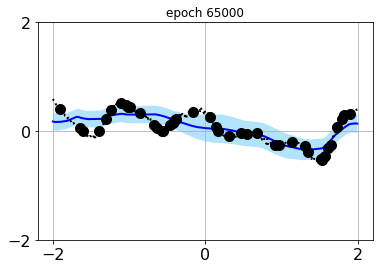

train: 65100 -0.6555
train: 65200 -0.6415
train: 65300 -0.6141
train: 65400 -0.6939
train: 65500 -0.5913
train: 65600 0.3291
train: 65700 -0.3898
train: 65800 -0.3637
train: 65900 -0.5646
train: 66000 -0.2308
train: 66100 -0.245
train: 66200 -0.6031
train: 66300 -0.4759
train: 66400 -0.293
train: 66500 -0.5612
train: 66600 -0.4972
train: 66700 -0.1064
train: 66800 -0.624
train: 66900 -0.5692
train: 67000 0.6284
train: 67100 -0.4339
train: 67200 -0.2647
train: 67300 -0.4461
train: 67400 -0.5603
train: 67500 0.2487
train: 67600 -0.2918
train: 67700 -0.3734
train: 67800 0.005057
train: 67900 -0.2184
train: 68000 -0.6369
train: 68100 -0.6717
train: 68200 -0.2967
train: 68300 -0.5906
train: 68400 -0.3586
train: 68500 -0.3405
train: 68600 -0.559
train: 68700 -0.4297
train: 68800 -0.384
train: 68900 -0.6318
train: 69000 -0.5671
train: 69100 -0.7246
train: 69200 -0.5696
train: 69300 -0.6761
train: 69400 -0.3284
train: 69500 -0.4868
train: 69600 -0.3016
train: 69700 -0.5472
train: 69800 -0.3524

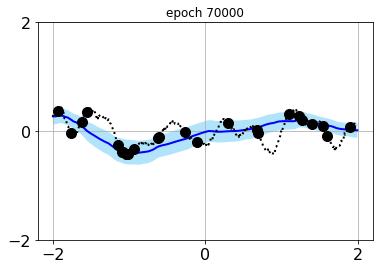

train: 70100 -0.6308
train: 70200 -0.6324
train: 70300 -0.4466
train: 70400 -0.3397
train: 70500 -0.4859
train: 70600 -0.4712
train: 70700 -0.5666
train: 70800 -0.4675
train: 70900 -0.494
train: 71000 -0.5291
train: 71100 -0.5492
train: 71200 -0.2206
train: 71300 -0.3999
train: 71400 -0.4293
train: 71500 -0.428
train: 71600 -0.3946
train: 71700 -0.722
train: 71800 -0.4989
train: 71900 -0.5032
train: 72000 -0.3629
train: 72100 -0.5504
train: 72200 -0.4529
train: 72300 -0.6499
train: 72400 -0.6617
train: 72500 -0.5534
train: 72600 -0.5168
train: 72700 -0.5097
train: 72800 -0.4929
train: 72900 -0.2385
train: 73000 -0.5748
train: 73100 -0.52
train: 73200 0.6264
train: 73300 -0.6384
train: 73400 -0.6059
train: 73500 -0.6357
train: 73600 -0.1385
train: 73700 -0.6341
train: 73800 -0.5348
train: 73900 -0.6438
train: 74000 -0.7087
train: 74100 -0.3484
train: 74200 -0.4897
train: 74300 -0.6807
train: 74400 -0.2819
train: 74500 -0.4799
train: 74600 -0.5518
train: 74700 -0.5643
train: 74800 -0.572

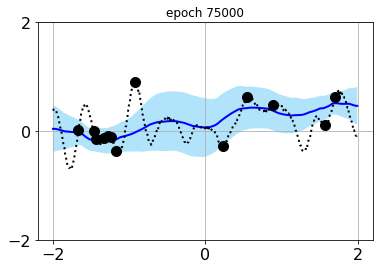

train: 75100 -0.2593
train: 75200 -0.6236
train: 75300 -0.08129
train: 75400 -0.3822
train: 75500 -0.6475
train: 75600 -0.4307
train: 75700 -0.4553
train: 75800 -0.4995
train: 75900 -0.4326
train: 76000 -0.5237
train: 76100 -0.6655
train: 76200 -0.3014
train: 76300 -0.4181
train: 76400 -0.5699
train: 76500 -0.5513
train: 76600 -0.5511
train: 76700 -0.4707
train: 76800 -0.5458
train: 76900 -0.4743
train: 77000 -0.2894
train: 77100 -0.6029
train: 77200 -0.1736
train: 77300 -0.5338
train: 77400 -0.6966
train: 77500 -0.5877
train: 77600 -0.3778
train: 77700 -0.5219
train: 77800 -0.4417
train: 77900 -0.711
train: 78000 -0.4956
train: 78100 -0.6015
train: 78200 -0.2942
train: 78300 -0.5023
train: 78400 -0.6093
train: 78500 -0.5752
train: 78600 -0.4982
train: 78700 0.5446
train: 78800 -0.4493
train: 78900 -0.514
train: 79000 -0.5537
train: 79100 -0.0422
train: 79200 -0.1685
train: 79300 -0.5534
train: 79400 -0.5862
train: 79500 -0.7527
train: 79600 -0.6949
train: 79700 -0.537
train: 79800 -0.

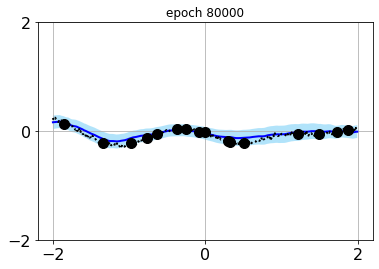

train: 80100 -0.6382
train: 80200 -0.5556
train: 80300 -0.4024
train: 80400 -0.6858
train: 80500 -0.4718
train: 80600 -0.4404
train: 80700 -0.1249
train: 80800 -0.6377
train: 80900 -0.6056
train: 81000 0.04496
train: 81100 -0.5175
train: 81200 -0.459
train: 81300 -0.6442
train: 81400 -0.4858
train: 81500 -0.6696
train: 81600 -0.5937
train: 81700 -0.677
train: 81800 -0.7368
train: 81900 0.02835
train: 82000 -0.4812
train: 82100 -0.5787
train: 82200 -0.5941
train: 82300 -0.7607
train: 82400 -0.01379
train: 82500 -0.544
train: 82600 -0.4083
train: 82700 -0.5421
train: 82800 -0.5329
train: 82900 -0.6963
train: 83000 -0.5836
train: 83100 -0.7281
train: 83200 -0.07811
train: 83300 -0.6082
train: 83400 -0.7577
train: 83500 -0.3074
train: 83600 -0.5638
train: 83700 -0.5026
train: 83800 -0.6515
train: 83900 -0.6092
train: 84000 -0.6231
train: 84100 -0.7262
train: 84200 -0.3121
train: 84300 0.2351
train: 84400 -0.7038
train: 84500 -0.6218
train: 84600 -0.6128
train: 84700 -0.5159
train: 84800 -0

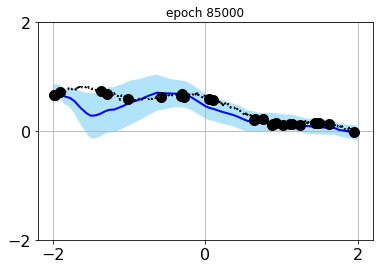

train: 85100 -0.7066
train: 85200 -0.4893
train: 85300 -0.3894
train: 85400 -0.6736
train: 85500 -0.5539
train: 85600 -0.2071
train: 85700 -0.5272
train: 85800 -0.3043
train: 85900 -0.3074
train: 86000 -0.4278
train: 86100 -0.7092
train: 86200 -0.5411
train: 86300 -0.6925
train: 86400 -0.719
train: 86500 -0.5624
train: 86600 -0.5489
train: 86700 -0.6837
train: 86800 -0.5912
train: 86900 -0.686
train: 87000 -0.608
train: 87100 -0.6017
train: 87200 -0.5255
train: 87300 -0.493
train: 87400 -0.4132
train: 87500 -0.374
train: 87600 -0.5148
train: 87700 -0.5235
train: 87800 0.2358
train: 87900 -0.6785
train: 88000 -0.4794
train: 88100 0.801
train: 88200 -0.2338
train: 88300 -0.6678
train: 88400 -0.5584
train: 88500 -0.7697
train: 88600 -0.605
train: 88700 -0.1149
train: 88800 -0.6044
train: 88900 -0.6848
train: 89000 -0.1964
train: 89100 -0.466
train: 89200 -0.4586
train: 89300 -0.4717
train: 89400 -0.5004
train: 89500 -0.7392
train: 89600 -0.7288
train: 89700 -0.7451
train: 89800 -0.701
tra

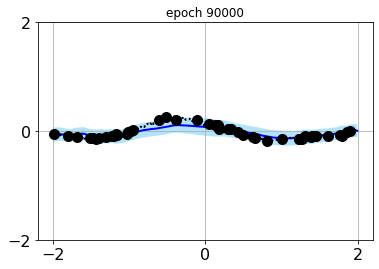

train: 90100 -0.6851
train: 90200 -0.7329
train: 90300 -0.6505
train: 90400 -0.4302
train: 90500 -0.7013
train: 90600 -0.6514
train: 90700 -0.5535
train: 90800 -0.4494
train: 90900 -0.3957
train: 91000 -0.2012
train: 91100 -0.3615
train: 91200 -0.7466
train: 91300 -0.6954
train: 91400 0.2363
train: 91500 -0.4793
train: 91600 -0.3451
train: 91700 -0.3886
train: 91800 -0.6714
train: 91900 -0.4519
train: 92000 -0.136
train: 92100 -0.4423
train: 92200 -0.7106
train: 92300 -0.4152
train: 92400 -0.6478
train: 92500 -0.56
train: 92600 -0.6129
train: 92700 -0.7449
train: 92800 -0.6618
train: 92900 -0.4279
train: 93000 -0.4671
train: 93100 -0.4209
train: 93200 -0.3372
train: 93300 -0.4563
train: 93400 -0.3912
train: 93500 0.004813
train: 93600 -0.5544
train: 93700 -0.7031
train: 93800 -0.7427
train: 93900 -0.6343
train: 94000 -0.5875
train: 94100 -0.7114
train: 94200 -0.6236
train: 94300 -0.6985
train: 94400 -0.2566
train: 94500 -0.4993
train: 94600 0.1537
train: 94700 -0.6535
train: 94800 -0.3

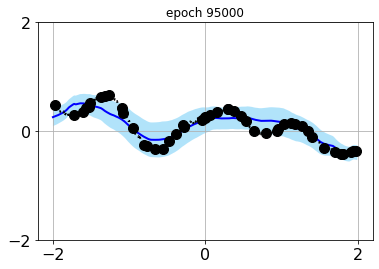

train: 95100 -0.6686
train: 95200 -0.5709
train: 95300 -0.7112
train: 95400 -0.5405
train: 95500 -0.6825
train: 95600 -0.538
train: 95700 -0.6084
train: 95800 -0.5746
train: 95900 -0.6882
train: 96000 -0.7418
train: 96100 -0.4833
train: 96200 -0.8083
train: 96300 -0.4333
train: 96400 -0.2728
train: 96500 -0.5085
train: 96600 -0.5066
train: 96700 -0.4973
train: 96800 -0.5204
train: 96900 -0.156
train: 97000 -0.4574
train: 97100 -0.3583
train: 97200 -0.7343
train: 97300 -0.5368
train: 97400 -0.6153
train: 97500 -0.3679
train: 97600 -0.5705
train: 97700 -0.5925
train: 97800 -0.538
train: 97900 -0.6398
train: 98000 -0.272
train: 98100 -0.6799
train: 98200 -0.6772
train: 98300 -0.5507
train: 98400 -0.6174
train: 98500 -0.5484
train: 98600 -0.6124
train: 98700 -0.6531
train: 98800 -0.6382
train: 98900 -0.2357
train: 99000 -0.5752
train: 99100 -0.4605
train: 99200 -0.6954
train: 99300 -0.615
train: 99400 -0.707
train: 99500 -0.6642
train: 99600 -0.7637
train: 99700 -0.1616
train: 99800 -0.505

In [8]:
epochs = 100000
for epoch in tqdm(range(epochs)):
    model.train()
    data_train = dataset_train.generate_curves()
    (context_x, context_y), target_x = data_train.query
    target_y = data_train.target_y
    context_x = context_x.cuda()
    context_y = context_y.cuda()
    target_x = target_x.cuda()
    target_y = target_y.cuda()

    optim.zero_grad()
    y_pred, kl, loss, y_std = model(context_x, context_y, target_x, target_y)
    if epoch % 100 == 0:
        print(f"train: {epoch} {loss.item():4.4g}")
    loss.backward()
    optim.step()
    if epoch % 5000 == 0:
        model.eval()
        with torch.no_grad():
            data_test = dataset_test.generate_curves()
            (context_x, context_y), target_x = data_test.query
            target_y = data_test.target_y
            context_x = context_x.cuda()
            context_y = context_y.cuda()
            target_x = target_x.cuda()
            target_y = target_y.cuda()
            y_pred, kl, loss, y_std = model(context_x, context_y, target_x)
            plt.title(f"epoch {epoch}")
            plot_functions(target_x.detach().cpu().numpy(),
                           target_y.detach().cpu().numpy(),
                           context_x.detach().cpu().numpy(),
                           context_y.detach().cpu().numpy(),
                           y_pred.detach().cpu().numpy(),
                           y_std.detach().cpu().numpy())